Task #10
=======

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt
import math

sns.set_theme()
#_____________________________from_#9___________________________________________
def OrnUhl_proc(a,s,th,N):
    """Generates Ornstein-Uhlenbeck process in [0,1] with dt = 1/(2^N)"""
    t = np.linspace(0, 1, 2**(N-1)+1)
    ou = np.array([np.random.normal(a,s**2),\
                            np.random.normal(0,s**2 *(1-np.e**(-2*th)))])
    for k in range(1,N):
        dt = 1 / 2**(k-1)
        sum = (ou[:-1] + ou[1:])
        e  = np.ones(2**(k-1)) * np.e**(-th*dt)
        e2  = np.ones(2**(k-1)) * np.e**(-th*dt/2)
        mean = sum * e2/(1+e)
        sigma2 = s**2 * (1-e)/(1+e)
        new_ou = np.zeros(2**k + 1)
        new_ou[::2] = ou
        new_ou[1::2] = np.random.normal(mean,sigma2,e.shape)
        ou = new_ou
    return t,ou
#_______________________________________________________________________________

In [3]:
def processFilter(y, r, sigma2, theta, dt):
    a = np.exp(-theta * dt)
    q = sigma2 * (1 - a*a)
    
    R = np.zeros(y.shape[0])
    x = np.zeros(y.shape[0])
    R0 = sigma2
    x0 = 0

    for i in range(0, y.shape[0]):
        R10 = a * a * R0 + q
        Z = R10 / (R10 + r)
        R[i] = (1 - Z) * R10

        x10 = a * x0
        x[i] = x10 + Z * (y[i] - x10)

        R0 = R[i]
        x0 = x[i]

    return x, R

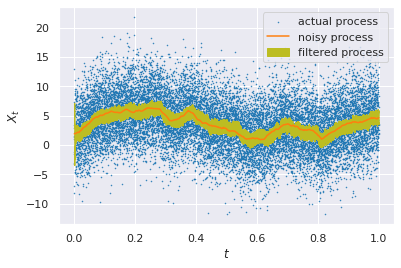

In [13]:
a, theta, sigma2, T = 0, 3, 4, 4
n = 15
t, X = OrnUhl_proc(a, np.sqrt(sigma2),theta, n)

r, gamma = 16, 0.99
noise = np.random.normal(0, np.sqrt(r), t.shape[0])
noised_sig = X + noise
z = sps.norm.ppf(1 - (1 - gamma)/2)

cleared_X, R = processFilter(noised_sig, r, sigma2, theta, t[1] - t[0])

plt.scatter(t, noised_sig, s=1,marker='.',color='tab:blue',linewidths=1)
plt.plot(t, X, color='tab:orange')
plt.fill_between(t, cleared_X + z * np.sqrt(R), cleared_X - z * np.sqrt(R), color="tab:olive")
plt.ylabel("$X_t$")
plt.xlabel("$t$")
plt.legend(["actual process", "noisy process", "filtered process"])


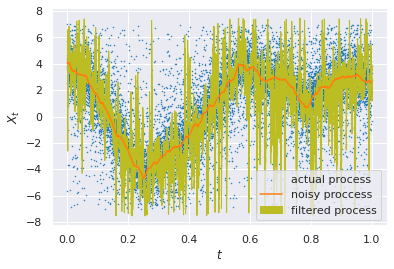

In [16]:
a, theta, sigma2, T = 0, 3, 4, 4
n = 15
t, X = OrnUhl_proc(a, np.sqrt(sigma2),theta, n)

r, gamma = 1, 0.99
noise = np.random.standard_cauchy(t.shape[0])
noised_sig = X + noise
z = sps.norm.ppf(1 - (1 - gamma)/2)
board = 7

cleared_X, R = processFilter(noised_sig, r, sigma2, theta, t[1] - t[0])

plt.scatter(t[np.abs(noised_sig) < board], noised_sig[np.abs(noised_sig) < board], s=1,marker='.',color='tab:blue',linewidths=1)
plt.plot(t, X, color='tab:orange')

ind = np.abs(cleared_X) < board
t = t[ind]
cleared_X = cleared_X[ind]
R = R[ind]
plt.fill_between(t, cleared_X+ z * np.sqrt(R), cleared_X - z * np.sqrt(R), color="tab:olive")
plt.ylabel("$X_t$")
plt.xlabel("$t$")
plt.legend(["actual process", "noisy proccess", "filtered process"])